In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install patool
import patoolib                       

import warnings
warnings.filterwarnings('ignore')

# красивый Progress_board
from tqdm import tqdm_notebook

%matplotlib inline

     |████████████████████████████████| 77 kB 3.4 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/my_drive')

Mounted at /content/my_drive


In [ ]:
data = pd.read_csv('/content/my_drive/MyDrive/DataSets/Data_processed_new_coords.csv', index_col=0)

In [ ]:
data.head()

,gps_height,longitude,latitude,region_code,district_code,population,construction_year,labels,amount_tsh_bool,month_recorded,funder_encoded,installer_encoded,scheme_management_encoded,scheme_name_encoded,public_meeting_encoded,permit_encoded,subvillage_encoded,wpt_name_encoded,management_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,basin_encoded,region_encoded,lga_encoded,ward_encoded,extraction_type_encoded,source_encoded,waterpoint_type_encoded
0,1390.0,34.938093,-9.856322,11,5,109.0,1999.0,True,False,3,1548,1706,7,2388,1,0,13116,9784,7,3,0,7,2,1,1,3,51,1429,3,8,1
1,1399.0,34.698766,-2.147466,20,2,280.0,2010.0,True,True,3,522,610,2,2385,1,1,17596,45426,11,1,3,7,2,2,4,9,103,1581,3,5,1
2,686.0,37.460664,-3.821329,21,4,250.0,2009.0,True,False,2,924,2296,7,2261,1,1,10096,17767,7,5,6,7,2,1,5,8,108,1629,3,0,2
3,263.0,38.486161,-11.155298,90,63,58.0,1986.0,True,True,1,1961,2078,7,1130,1,1,9998,45537,7,1,3,7,2,0,7,12,87,1576,14,3,2
4,1328.8,31.130847,-1.825359,18,1,264.0,2005.4,True,True,7,20,133,7,204,1,1,8583,43411,2,1,3,7,2,4,4,4,26,1692,3,5,1


In [ ]:
# Разархивируем архив
patoolib.extract_archive('/content/my_drive/MyDrive/DataSets/Pump_it_Up.rar', outdir='/content' )

patool: Extracting /content/my_drive/MyDrive/DataSets/Pump_it_Up.rar ...
patool: running /usr/bin/unrar x -- /content/my_drive/MyDrive/DataSets/Pump_it_Up.rar
patool:     with cwd='/content'
patool: ... /content/my_drive/MyDrive/DataSets/Pump_it_Up.rar extracted to `/content'.


'/content'

In [ ]:
data_labels = pd.read_csv('/content/Pump_it_Up/y_train.csv')

In [ ]:
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


# Feature Engeneering

**Посмотрим корреляцию между атрибутами**

In [ ]:
data.drop('scheme_management_encoded', axis=1, inplace=True)

In [ ]:
for atribute in data.columns:
  space = '                         '
  nou = len(data[atribute].unique())
  print(f'Кол-во уник. знач. для {atribute}{space[len(atribute):]}:', nou)

Кол-во уник. знач. для gps_height               : 3191
Кол-во уник. знач. для longitude                : 72082
Кол-во уник. знач. для latitude                 : 72081
Кол-во уник. знач. для region_code              : 27
Кол-во уник. знач. для district_code            : 20
Кол-во уник. знач. для population               : 1591
Кол-во уник. знач. для construction_year        : 203
Кол-во уник. знач. для labels                   : 2
Кол-во уник. знач. для amount_tsh_bool          : 2
Кол-во уник. знач. для month_recorded           : 12
Кол-во уник. знач. для funder_encoded           : 2140
Кол-во уник. знач. для installer_encoded        : 2410
Кол-во уник. знач. для scheme_name_encoded      : 2868
Кол-во уник. знач. для public_meeting_encoded   : 2
Кол-во уник. знач. для permit_encoded           : 2
Кол-во уник. знач. для subvillage_encoded       : 21425
Кол-во уник. знач. для wpt_name_encoded         : 45683
Кол-во уник. знач. для management_encoded       : 11
Кол-во уник. знач. для paym

In [ ]:
'''
ЗАМЕТКА:
Видно, что у некоторых атрибутов очень много уникальных значений, что
плохой показатель для построения любой модели

ЦЕЛЬ:
Избавиться от большого количеста уникальных значений, сохранив содержательность информации

ГИПОТЕЗА:
Вместо самого значения можно использовать частоту его встречаемости по всей выборке, т.е.
если из  1000 данное значение встречается 100 раз, то вместо него пишем 0.1  

ЗАДАЧИ:
- определить пороговое значение количеста уникальных значений атрибута, 
начиная с которого будет применяться замена по частоте
- применить замену по частоте для атрибутов с количеством
уникальных значений выше порога
'''
print()

In [ ]:
# оценка частоты встречаемости на примере "wpt_name_encoded"
data.wpt_name_encoded.value_counts(normalize=True)

43411    0.029832
45426    0.013939
1330     0.012040
36358    0.008741
9588     0.005751
           ...   
20899    0.000013
22946    0.000013
16801    0.000013
18848    0.000013
0        0.000013
Name: wpt_name_encoded, Length: 45683, dtype: float64

In [ ]:
####################################################
# Частотное заполнение, где пороговое значения - 27.
####################################################

for atribute in data.columns:

  condition_1 = len(data[atribute].unique()) > 27
  condition_2 = atribute not in list1             # не оправдало надежд...
  condition  = condition_1 & condition_2

  if condition_1:
    freq_enc = data[atribute].value_counts(normalize=True)
    data[atribute] = data[atribute].map(freq_enc)


In [ ]:
# теперь кол-во уникальных значений сократилось
for atribute in data.columns:
  space = '                         '
  nou = len(data[atribute].unique())
  print(f'Кол-во уник. знач. для {atribute}{space[len(atribute):]}:', nou)

Кол-во уник. знач. для gps_height               : 131
Кол-во уник. знач. для longitude                : 19
Кол-во уник. знач. для latitude                 : 19
Кол-во уник. знач. для region_code              : 27
Кол-во уник. знач. для district_code            : 20
Кол-во уник. знач. для population               : 185
Кол-во уник. знач. для construction_year        : 138
Кол-во уник. знач. для labels                   : 2
Кол-во уник. знач. для amount_tsh_bool          : 2
Кол-во уник. знач. для month_recorded           : 12
Кол-во уник. знач. для funder_encoded           : 177
Кол-во уник. знач. для installer_encoded        : 175
Кол-во уник. знач. для scheme_name_encoded      : 189
Кол-во уник. знач. для public_meeting_encoded   : 2
Кол-во уник. знач. для permit_encoded           : 2
Кол-во уник. знач. для subvillage_encoded       : 112
Кол-во уник. знач. для wpt_name_encoded         : 99
Кол-во уник. знач. для management_encoded       : 11
Кол-во уник. знач. для payment_encoded     

In [ ]:
data.head()

,gps_height,longitude,latitude,region_code,district_code,population,construction_year,labels,amount_tsh_bool,month_recorded,funder_encoded,installer_encoded,scheme_name_encoded,public_meeting_encoded,permit_encoded,subvillage_encoded,wpt_name_encoded,management_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,basin_encoded,region_encoded,lga_encoded,ward_encoded,extraction_type_encoded,source_encoded,waterpoint_type_encoded
0,0.000539,0.000013,0.000013,11,5,0.000296,0.018316,True,False,3,0.004552,0.001616,0.002303,1,0,0.000081,0.001764,7,3,0,7,2,1,1,3,0.009253,0.000552,3,8,1
1,0.000525,0.000013,0.000013,20,2,0.001859,0.044714,True,True,3,0.000862,0.000673,0.000835,1,1,0.000081,0.013939,11,1,3,7,2,2,4,9,0.012189,0.001212,3,5,1
2,0.000148,0.000013,0.000013,21,4,0.028135,0.043152,True,False,2,0.000121,0.007111,0.000189,1,1,0.008512,0.000040,7,5,6,7,2,1,5,8,0.005010,0.000175,3,0,2
3,0.000458,0.000013,0.000013,90,63,0.000418,0.023556,True,True,1,0.020364,0.003838,0.002640,1,1,0.000323,0.000027,7,1,3,7,2,0,7,12,0.002869,0.000552,14,3,2
4,0.006747,0.000013,0.000013,18,1,0.006909,0.013953,True,True,7,0.000013,0.002276,0.000337,1,1,0.000027,0.029832,2,1,3,7,2,4,4,4,0.013024,0.000189,3,5,1


# Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import utils #Утилиты для to_categorical

from tensorflow.keras.models import Sequential # save_model #Сеть прямого распространения
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import SGD, Adam, Adadelta # оптимизаторы

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import classification_report

from keras.models import load_model

In [ ]:
data.head()

,gps_height,longitude,latitude,region_code,district_code,population,construction_year,labels,amount_tsh_bool,month_recorded,funder_encoded,installer_encoded,scheme_name_encoded,public_meeting_encoded,permit_encoded,subvillage_encoded,wpt_name_encoded,management_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,basin_encoded,region_encoded,lga_encoded,ward_encoded,extraction_type_encoded,source_encoded,waterpoint_type_encoded
0,0.000539,0.000013,0.000013,11,5,0.000296,0.018316,True,False,3,0.004552,0.001616,0.002303,1,0,0.000081,0.001764,7,3,0,7,2,1,1,3,0.009253,0.000552,3,8,1
1,0.000525,0.000013,0.000013,20,2,0.001859,0.044714,True,True,3,0.000862,0.000673,0.000835,1,1,0.000081,0.013939,11,1,3,7,2,2,4,9,0.012189,0.001212,3,5,1
2,0.000148,0.000013,0.000013,21,4,0.028135,0.043152,True,False,2,0.000121,0.007111,0.000189,1,1,0.008512,0.000040,7,5,6,7,2,1,5,8,0.005010,0.000175,3,0,2
3,0.000458,0.000013,0.000013,90,63,0.000418,0.023556,True,True,1,0.020364,0.003838,0.002640,1,1,0.000323,0.000027,7,1,3,7,2,0,7,12,0.002869,0.000552,14,3,2
4,0.006747,0.000013,0.000013,18,1,0.006909,0.013953,True,True,7,0.000013,0.002276,0.000337,1,1,0.000027,0.029832,2,1,3,7,2,4,4,4,0.013024,0.000189,3,5,1


In [ ]:
# Заменяем болевые значение атрибута amount_tsh_bool на 0 и 1
data['amount_tsh_bool'] = data.amount_tsh_bool.astype(int)

In [ ]:
train = data[data.labels==True]
test = data[data.labels==False]
y = data_labels.status_group

In [ ]:
train.head()

,gps_height,longitude,latitude,region_code,district_code,population,construction_year,labels,amount_tsh_bool,month_recorded,funder_encoded,installer_encoded,scheme_name_encoded,public_meeting_encoded,permit_encoded,subvillage_encoded,wpt_name_encoded,management_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,basin_encoded,region_encoded,lga_encoded,ward_encoded,extraction_type_encoded,source_encoded,waterpoint_type_encoded
0,0.000539,0.000013,0.000013,11,5,0.000296,0.018316,True,0,3,0.004552,0.001616,0.002303,1,0,0.000081,0.001764,7,3,0,7,2,1,1,3,0.009253,0.000552,3,8,1
1,0.000525,0.000013,0.000013,20,2,0.001859,0.044714,True,1,3,0.000862,0.000673,0.000835,1,1,0.000081,0.013939,11,1,3,7,2,2,4,9,0.012189,0.001212,3,5,1
2,0.000148,0.000013,0.000013,21,4,0.028135,0.043152,True,0,2,0.000121,0.007111,0.000189,1,1,0.008512,0.000040,7,5,6,7,2,1,5,8,0.005010,0.000175,3,0,2
3,0.000458,0.000013,0.000013,90,63,0.000418,0.023556,True,1,1,0.020364,0.003838,0.002640,1,1,0.000323,0.000027,7,1,3,7,2,0,7,12,0.002869,0.000552,14,3,2
4,0.006747,0.000013,0.000013,18,1,0.006909,0.013953,True,1,7,0.000013,0.002276,0.000337,1,1,0.000027,0.029832,2,1,3,7,2,4,4,4,0.013024,0.000189,3,5,1


In [ ]:
# Удаляем атрибут labels, т.к. уже произведено разделение на обучающую и тестовую выборки
train.drop('labels', axis=1, inplace=True)
test.drop('labels', axis=1, inplace=True)

In [ ]:
y.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [ ]:
print(train.shape, y.shape )

(59400, 29) (59400,)


In [ ]:
'''
ЗАМЕТКА:
Наблюдается сильная разбалансировка классов:
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677

Поэтому при создании проверочной и тестовой это нужно учитывать
Для сбалансированного деления для метода train_test_split
будем использовать stratify=True
'''
print()

In [ ]:
train_v = train.values.copy()

In [ ]:
y_v = y.values.copy()

In [ ]:
type(y_v)

numpy.ndarray

In [ ]:
# stratify=True - сбалансированно делит нашу выборку т.е. в x_train и в x_test
# functional, non functional, functional needs repair будут в одинаковых пропорциях

x_train, x_test, y_train, y_test = train_test_split(train_v, y_v, 
                                                    test_size=0.3,
                                                    stratify=y.values)

In [ ]:
pd_y_train = pd.DataFrame(y_train)
pd_y_test = pd.DataFrame(y_test)

In [ ]:
# проверка распределения классов на обучающей выборке
pd_y_train.value_counts(normalize=True)

functional                 0.543074
non functional             0.384247
functional needs repair    0.072679
dtype: float64

In [ ]:
# проверка распределения классов на тестовой выборке
pd_y_test.value_counts(normalize=True)

functional                 0.543098
non functional             0.384231
functional needs repair    0.072671
dtype: float64

In [ ]:
x_test.shape

(17820, 29)

## Dense Model

In [ ]:
print(type(x_train),' / ', x_train.shape)
print(type(y_train),' / ', y_train.shape)
print(type(x_test),' / ', x_test.shape)
print(type(y_test),' / ', y_test.shape)

<class 'numpy.ndarray'>  /  (41580, 29)
<class 'numpy.ndarray'>  /  (41580,)
<class 'numpy.ndarray'>  /  (17820, 29)
<class 'numpy.ndarray'>  /  (17820,)


In [ ]:
###########################################################################################################
# Создание самописной функции Recall, демонстрирует способность алгоритма обнаруживать данный класс вообще.
###########################################################################################################

def checker(model, x_test, y_test):
  
  dic = {
      'functional': 0.543098,
      'functional needs repair': 0.072671,
      'non functional': 0.384231          
  }
  funk_list = []
  need_list = []
  none_list = []
  len_all = x_test.shape[0]

  for index in tqdm_notebook(range(x_test.shape[0])):
    sample = x_test[index].reshape(1,29)
    now_class = y_test_ohe[index].argmax()
    now_predict = model_0.predict(sample)[0].argmax()

    if now_class == 0:
      if now_class == now_predict:
        funk_list.append(1)
    elif now_class == 1:    
      if now_class == now_predict:
        need_list.append(1)
    elif now_class == 2:    
      if now_class == now_predict:
        none_list.append(1)

  prob_1 = (len(funk_list)/len_all) / dic['functional']
  prob_2 = (len(need_list)/len_all) / dic['functional needs repair']
  prob_3 = (len(none_list)/len_all) / dic['non functional']

  prob_all = prob_1 * prob_2 * prob_3

  print(f'Доля верно угаданных "functional" - {prob_1}')
  print(f'Доля верно угаданных "functional needs repair" - {prob_2}')
  print(f'Доля верно угаданных "non functional" - {prob_3}')
  print(f'Доля верно угаданных по всем - {prob_all}')

### Preprocessing

In [ ]:
######################################
# перефодим наши targets в формат OHE.
######################################

label_encoder = LabelEncoder()

integer_encoded = label_encoder.fit_transform(y_train) 
print(integer_encoded[:5])

y_train_ohe = utils.to_categorical(integer_encoded, 3)
print(y_train_ohe.shape)

integer_encoded = label_encoder.fit_transform(y_test) 
print(integer_encoded[:5])

y_test_ohe = utils.to_categorical(integer_encoded, 3)
print(y_test_ohe.shape)

[0 2 2 2 2]
(41580, 3)
[2 2 2 0 2]
(17820, 3)


In [ ]:
##########################
# Шкалируем наши значения.
##########################

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled[0]

array([-0.47895205, -0.13599696, -0.13599696,  3.6919522 ,  1.78812416,
        2.54971141,  0.94916636,  0.6548786 , -1.11497046, -0.64321192,
       -0.65036611, -0.50860895,  0.3204431 ,  0.67368105, -0.29453589,
       -0.29431717, -0.19613976, -0.94916245, -0.0860356 ,  0.31096462,
       -0.29611061, -0.39008006,  1.17994131, -0.47577906, -0.7092627 ,
       -0.51892341, -0.79004588, -0.0356279 , -0.88124707])

In [ ]:
x_test_scaled[0]

array([ 0.4065987 , -0.13599696, -0.13599696,  0.21320071, -0.06727572,
       -0.56272509, -0.879096  ,  0.6548786 ,  1.19915218, -0.61594435,
       -0.69470582, -0.44478112,  0.3204431 ,  0.67368105, -0.20652918,
       -0.29431717, -0.19613976, -0.94916245, -0.0860356 ,  0.31096462,
       -0.29611061, -1.46678802, -0.03114613,  0.53525448, -0.80974583,
       -0.68420957,  0.63632817,  0.45571803,  0.80655823])

### Building + Training

In [ ]:
#################
# гиперпараметры
#################

batch_size = 10 
epochs = 25


#####################################################
# Функция построения модели прототипа классификатора
#####################################################
def model():
  model = Sequential()                                    # Создаем последовательную модель      

  model.add(Dense(units=32, activation='relu', input_shape = x_train.shape[1:])) 
  model.add(Dropout(0.2))    
  model.add(Dense(32, activation='relu'))                 # полносвязный слой (предклассификация признаков)
  model.add(Dropout(0.2))                                 # слой дропаута (защита от переобучения)
  model.add(Dense(3, activation='softmax'))               # final Dense (финальная классификация на 3 класса)

  #Компилируем сеть
  model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

  return model

model_1 = model()

Epoch 1/25
4158/4158 [==============================] - 19s 4ms/step - loss: 0.9326 - accuracy: 0.5308 - val_loss: 0.8523 - val_accuracy: 0.5914
Epoch 2/25
4158/4158 [==============================] - 17s 4ms/step - loss: 0.8481 - accuracy: 0.5984 - val_loss: 0.8088 - val_accuracy: 0.6349
Epoch 3/25
4158/4158 [==============================] - 17s 4ms/step - loss: 0.8144 - accuracy: 0.6275 - val_loss: 0.7843 - val_accuracy: 0.6547
Epoch 4/25
4158/4158 [==============================] - 16s 4ms/step - loss: 0.7927 - accuracy: 0.6486 - val_loss: 0.7666 - val_accuracy: 0.6643
Epoch 5/25
4158/4158 [==============================] - 15s 4ms/step - loss: 0.7718 - accuracy: 0.6594 - val_loss: 0.7524 - val_accuracy: 0.6700
Epoch 6/25
4158/4158 [==============================] - 17s 4ms/step - loss: 0.7575 - accuracy: 0.6695 - val_loss: 0.7397 - val_accuracy: 0.6831
Epoch 7/25
4158/4158 [==============================] - 17s 4ms/step - loss: 0.7429 - accuracy: 0.6810 - val_loss: 0.7287 - val_ac

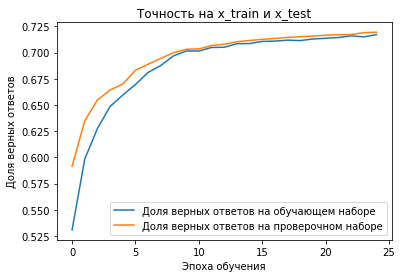

In [ ]:
##############
# обучение НС
##############
lr_list = []

history = model_1.fit(x_train_scaled, 
                    y_train_ohe, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test_scaled, y_test_ohe),
                    verbose=1, 
                    shuffle=True)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.title('Точность на x_train и x_test')
plt.legend()
plt.show()

In [ ]:
#####################################################
# Функция построения модели прототипа классификатора
#####################################################
def model():
  model = Sequential()                                    # Создаем последовательную модель      

  model.add(Dense(units=16, activation='relu', input_shape = x_train.shape[1:]))  
  model.add(Dense(16, activation='relu'))                 # полносвязный слой (предклассификация признаков)
  model.add(Dropout(0.15))                                 # слой дропаута (защита от переобучения)
  model.add(Dense(16, activation='relu'))                 # полносвязный слой (предклассификация признаков)
  model.add(Dropout(0.2))                                 # слой дропаута (защита от переобучения)
  model.add(Dense(3, activation='softmax'))               # final Dense (финальная классификация на 3 класса)

  #Компилируем сеть
  model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

  return model

In [ ]:
model_2 = model()

In [ ]:
#################
# гиперпараметры
#################

batch_size = 10 
epochs = 25

Epoch 1/35
4158/4158 [==============================] - 59s 2ms/step - loss: 0.9115 - accuracy: 0.5539 - val_loss: 0.8408 - val_accuracy: 0.6052
Epoch 2/35
4158/4158 [==============================] - 9s 2ms/step - loss: 0.8442 - accuracy: 0.6052 - val_loss: 0.8103 - val_accuracy: 0.6304
Epoch 3/35
4158/4158 [==============================] - 9s 2ms/step - loss: 0.8199 - accuracy: 0.6246 - val_loss: 0.7928 - val_accuracy: 0.6441
Epoch 4/35
4158/4158 [==============================] - 9s 2ms/step - loss: 0.8025 - accuracy: 0.6373 - val_loss: 0.7760 - val_accuracy: 0.6579
Epoch 5/35
4158/4158 [==============================] - 8s 2ms/step - loss: 0.7860 - accuracy: 0.6498 - val_loss: 0.7615 - val_accuracy: 0.6674
Epoch 6/35
4158/4158 [==============================] - 9s 2ms/step - loss: 0.7716 - accuracy: 0.6603 - val_loss: 0.7487 - val_accuracy: 0.6802
Epoch 7/35
4158/4158 [==============================] - 9s 2ms/step - loss: 0.7593 - accuracy: 0.6700 - val_loss: 0.7352 - val_accuracy

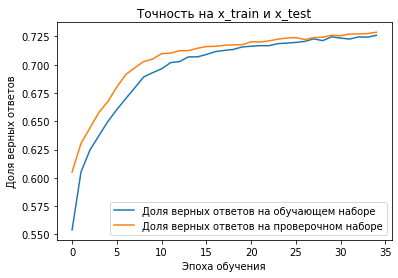

In [ ]:
##############
# обучение НС
##############
lr_list = []

history = model_2.fit(x_train_scaled, 
                    y_train_ohe, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test_scaled, y_test_ohe),
                    verbose=1, 
                    shuffle=True)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.title('Точность на x_train и x_test')
plt.legend()
plt.show()

### Interpretation

In [ ]:
# Загружаем сохраненную модель
model_0 = load_model('/content/my_drive/MyDrive/Colab Notebooks/Pump_it_up/Dense_last.h5')

In [ ]:
x_train_scaled[0]

array([-0.47895205, -0.13599696, -0.13599696,  3.6919522 ,  1.78812416,
        2.54971141,  0.94916636,  0.6548786 , -1.11497046, -0.64321192,
       -0.65036611, -0.50860895,  0.3204431 ,  0.67368105, -0.29453589,
       -0.29431717, -0.19613976, -0.94916245, -0.0860356 ,  0.31096462,
       -0.29611061, -0.39008006,  1.17994131, -0.47577906, -0.7092627 ,
       -0.51892341, -0.79004588, -0.0356279 , -0.88124707])

In [ ]:
x_test[0]

array([3.63636364e-03, 1.34680135e-05, 1.34680135e-05, 1.90000000e+01,
       5.00000000e+00, 3.63636364e-03, 8.88888889e-03, 1.00000000e+00,
       8.00000000e+00, 2.11447811e-03, 3.47474747e-03, 1.02356902e-03,
       1.00000000e+00, 1.00000000e+00, 2.28956229e-04, 1.34680135e-05,
       7.00000000e+00, 1.00000000e+00, 3.00000000e+00, 7.00000000e+00,
       2.00000000e+00, 0.00000000e+00, 4.00000000e+00, 1.30000000e+01,
       5.53535354e-03, 3.90572391e-04, 9.00000000e+00, 7.00000000e+00,
       4.00000000e+00])

In [ ]:
test_v = test.values.copy()

test_v = scaler.transform(test_v)

In [ ]:
#########################################
# Получение  precision, recall, f1-score.
#########################################

integer_unencod = label_encoder.inverse_transform(integer_encoded)

prediction = model_0.predict(x_test_scaled)
predict_class = np.argmax(prediction, axis=1)

print(classification_report(integer_encoded, predict_class))
'''
Recall демонстрирует способность алгоритма обнаруживать данный класс вообще,
а precision — способность отличать этот класс от других классов.
'''
print()

              precision    recall  f1-score   support

           0       0.70      0.92      0.79      9678
           1       0.00      0.00      0.00      1295
           2       0.81      0.60      0.69      6847

    accuracy                           0.73     17820
   macro avg       0.50      0.51      0.49     17820
weighted avg       0.69      0.73      0.69     17820




In [ ]:
'''
ЗАМЕТКА:
По данным report хорошо видно, что класс functional needs repair 
совсем не обнаруживается и не различается, что свидетельствует о том,
что НС трудно детектировать самый маленький класс.
'''
print()

In [ ]:
checker(model_0, x_test_scaled, y_test)

  0%|          | 0/17820 [00:00<?, ?it/s]

Доля верно угаданных "functional" - 0.9206441563032823
Доля верно угаданных "functional needs repair" - 0.0
Доля верно угаданных "non functional" - 0.5951514722713993
Доля верно угаданных по всем - 0.0


In [ ]:
'''
ЗАМЕТКА:
Наша самописная функция checker отлично справляется с подсчетом 
показателя recall, что хорошо видно из сравнения с данными,
которые вернул classification_report.
'''
print()

### Train on all data

Тренировка НС на всех размеченных данных 

In [ ]:
y_train_all =  np.concatenate((y_train_ohe, y_test_ohe), axis=0)

In [ ]:
y_train_all.shape

(59400, 3)

In [ ]:
x_train_all =  np.concatenate((x_train_scaled, x_test_scaled), axis=0)

In [ ]:
x_train_all.shape

(59400, 29)

In [ ]:
model_2 = model()

In [ ]:
#################
# гиперпараметры
#################

batch_size = 10 
epochs = 30

Epoch 1/30
5940/5940 [==============================] - 10s 2ms/step - loss: 0.9001 - accuracy: 0.5570
Epoch 2/30
5940/5940 [==============================] - 9s 2ms/step - loss: 0.8307 - accuracy: 0.6142
Epoch 3/30
5940/5940 [==============================] - 9s 2ms/step - loss: 0.8013 - accuracy: 0.6404
Epoch 4/30
5940/5940 [==============================] - 10s 2ms/step - loss: 0.7798 - accuracy: 0.6572
Epoch 5/30
5940/5940 [==============================] - 10s 2ms/step - loss: 0.7590 - accuracy: 0.6736
Epoch 6/30
5940/5940 [==============================] - 10s 2ms/step - loss: 0.7388 - accuracy: 0.6906
Epoch 7/30
5940/5940 [==============================] - 10s 2ms/step - loss: 0.7228 - accuracy: 0.6994
Epoch 8/30
5940/5940 [==============================] - 10s 2ms/step - loss: 0.7132 - accuracy: 0.7062
Epoch 9/30
5940/5940 [==============================] - 10s 2ms/step - loss: 0.7045 - accuracy: 0.7113
Epoch 10/30
5940/5940 [==============================] - 10s 2ms/step - los

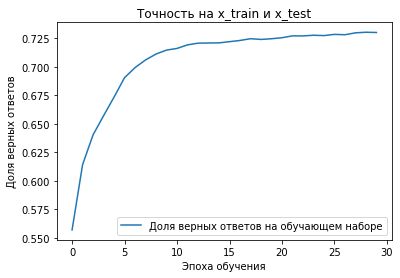

In [ ]:
##############
# обучение НС
##############
lr_list = []

history = model_2.fit(x_train_all, 
                    y_train_all, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=1, 
                    shuffle=True)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.title('Точность на x_train и x_test')
plt.legend()
plt.show()

In [ ]:
model_2.save('/content/my_drive/MyDrive/Colab Notebooks/Pump_it_up/Dense_last.h5')

# Submit

In [ ]:
model_now = load_model('/content/my_drive/MyDrive/Colab Notebooks/Pump_it_up/Dense_last.h5')
submit_form = pd.read_csv('/content/Pump_it_Up/SubmissionFormat.csv')
test_v = test.values.copy()

test_v = scaler.transform(test_v)

prediction = model_now.predict(test_v, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)


In [ ]:
#############################################################
# Функция перевода таргета их OHE в первоначальное состояние.
############################################################

def ans_to_lable(data):

  ans_list = []

  for sample in tqdm_notebook(data):
    if sample.argmax() == 0:
      ans_list.append('functional')
    elif sample.argmax() == 1:
      ans_list.append('functional needs repair')     
    elif sample.argmax() == 2:
      ans_list.append('non functional')
  return ans_list

In [ ]:
ans_list = ans_to_lable(prediction)

answer = np.array(ans_list)
submit_form['status_group'] = answer
submit_form

submit_form.to_csv('/content/my_drive/MyDrive/DataSets/submit_6_Dense_final.csv', index=False)

  0%|          | 0/14850 [00:00<?, ?it/s]

# Accuracy on DrivenData


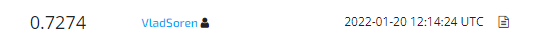